# Análise de feedbacks

Análise dos comentários presentes nas base 'barber_shop'.

## Extração de dados

In [1]:
from dotenv import load_dotenv
from sqlalchemy import create_engine
import pandas as pd
import os

load_dotenv()

True

In [2]:
user = os.getenv('user')
password = os.getenv('password')
host = os.getenv('host')
port = os.getenv('port')
database = os.getenv('database')
ssl_cert= '../configs/ca.crt'

engine = create_engine(f'postgresql+psycopg2://{user}:{password}@{host}:{port}/{database}?sslmode=require&channel_binding=require')

In [3]:
with open('../sql_queries/select_feedbacks.sql', 'r') as file:
    query = file.read()

data = pd.read_sql(query, engine)

In [4]:
data

,dat_comp,av_comentario,nm_cliente,nm_funcionario,tp_servico
0,2022-02-01,"Resultado aceitável, mas esperava mais.",Catarina Rocha,Maria Oliveira,Alisamento
1,2022-04-01,"Não gostei, o profissional foi desatento e o c...",Anthony da Mata,João Silva,Alisamento
2,2022-03-01,"Péssimo serviço, não volto mais.",Kamilly Santos,Maria Oliveira,Alisamento
3,2021-12-01,"O resultado não foi satisfatório, poderia ser ...",Kamilly Gonçalves,Maria Oliveira,Alisamento
4,2021-07-01,"Foi bom, mas o atendimento precisa melhorar.",Heloísa Correia,Carlos Souza,Alisamento
...,...,...,...,...,...
2995,2023-06-01,"Não gostei muito, não ficou como esperado.",Enzo Gomes,Ana Lima,Tratamento capilar
2996,2023-08-01,"Corte bom, voltarei mais vezes.",Lucca Ferreira,João Silva,Tratamento capilar
2997,2022-06-01,"Corte horrível, totalmente diferente do que pedi.",Rafaela da Rosa,Ana Lima,Tratamento capilar
2998,2022-09-01,"Bom serviço, mas poderia ser um pouco mais ráp...",Helena Melo,Ana Lima,Tratamento capilar


# Pré-processamento do texto

Cada comentário define um corpus

## Tokenização

Tokenizando cada comentário individualmente

In [5]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pedro\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pedro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
data['tokens'] = data['av_comentario'].apply(
    lambda comentario: nltk.word_tokenize(comentario.lower(), language= 'portuguese')
    )

### Remoção de stopwords e palavras do negócio

In [7]:
from nltk.corpus import stopwords

In [8]:
#stopwords.words('portuguese')

In [9]:
ajuste_stopwords = ['não']

stopwords_ptBr = [word for word in stopwords.words('portuguese') if word not in ajuste_stopwords]

data['tokens_sem_stopwords'] = data['tokens'].apply(
    lambda tokens: [token for token in tokens if token not in stopwords_ptBr]
)

In [10]:
business_words = ['corte', 'serviço', 'atendimento']

data['tokens_sem_stopwords'] = data['tokens_sem_stopwords'].apply(
    lambda tokens: [token for token in tokens if token not in business_words]
)

### Remoção de números

In [11]:
import re

In [12]:
data['tokens_sem_stopwords_sem_numeros'] = data['tokens_sem_stopwords'].apply(
    lambda tokens: [re.sub('\d+', '', token) for token in tokens]
)

### Remoção de pontuação

In [13]:
import string

In [14]:
data['tokens_sem_stopwords_sem_numeros_sem_pontuacao'] = data['tokens_sem_stopwords_sem_numeros'].apply(
    lambda tokens: [token for token in tokens if token not in string.punctuation]
)

In [15]:
data

,dat_comp,av_comentario,nm_cliente,nm_funcionario,tp_servico,tokens,tokens_sem_stopwords,tokens_sem_stopwords_sem_numeros,tokens_sem_stopwords_sem_numeros_sem_pontuacao
0,2022-02-01,"Resultado aceitável, mas esperava mais.",Catarina Rocha,Maria Oliveira,Alisamento,"[resultado, aceitável, ,, mas, esperava, mais, .]","[resultado, aceitável, ,, esperava, .]","[resultado, aceitável, ,, esperava, .]","[resultado, aceitável, esperava]"
1,2022-04-01,"Não gostei, o profissional foi desatento e o c...",Anthony da Mata,João Silva,Alisamento,"[não, gostei, ,, o, profissional, foi, desaten...","[não, gostei, ,, profissional, desatento, fico...","[não, gostei, ,, profissional, desatento, fico...","[não, gostei, profissional, desatento, ficou, ..."
2,2022-03-01,"Péssimo serviço, não volto mais.",Kamilly Santos,Maria Oliveira,Alisamento,"[péssimo, serviço, ,, não, volto, mais, .]","[péssimo, ,, não, volto, .]","[péssimo, ,, não, volto, .]","[péssimo, não, volto]"
3,2021-12-01,"O resultado não foi satisfatório, poderia ser ...",Kamilly Gonçalves,Maria Oliveira,Alisamento,"[o, resultado, não, foi, satisfatório, ,, pode...","[resultado, não, satisfatório, ,, poderia, mel...","[resultado, não, satisfatório, ,, poderia, mel...","[resultado, não, satisfatório, poderia, melhor]"
4,2021-07-01,"Foi bom, mas o atendimento precisa melhorar.",Heloísa Correia,Carlos Souza,Alisamento,"[foi, bom, ,, mas, o, atendimento, precisa, me...","[bom, ,, precisa, melhorar, .]","[bom, ,, precisa, melhorar, .]","[bom, precisa, melhorar]"
...,...,...,...,...,...,...,...,...,...
2995,2023-06-01,"Não gostei muito, não ficou como esperado.",Enzo Gomes,Ana Lima,Tratamento capilar,"[não, gostei, muito, ,, não, ficou, como, espe...","[não, gostei, ,, não, ficou, esperado, .]","[não, gostei, ,, não, ficou, esperado, .]","[não, gostei, não, ficou, esperado]"
2996,2023-08-01,"Corte bom, voltarei mais vezes.",Lucca Ferreira,João Silva,Tratamento capilar,"[corte, bom, ,, voltarei, mais, vezes, .]","[bom, ,, voltarei, vezes, .]","[bom, ,, voltarei, vezes, .]","[bom, voltarei, vezes]"
2997,2022-06-01,"Corte horrível, totalmente diferente do que pedi.",Rafaela da Rosa,Ana Lima,Tratamento capilar,"[corte, horrível, ,, totalmente, diferente, do...","[horrível, ,, totalmente, diferente, pedi, .]","[horrível, ,, totalmente, diferente, pedi, .]","[horrível, totalmente, diferente, pedi]"
2998,2022-09-01,"Bom serviço, mas poderia ser um pouco mais ráp...",Helena Melo,Ana Lima,Tratamento capilar,"[bom, serviço, ,, mas, poderia, ser, um, pouco...","[bom, ,, poderia, pouco, rápido, .]","[bom, ,, poderia, pouco, rápido, .]","[bom, poderia, pouco, rápido]"


# Visualização de palavras

Avaliar a frequência de palavras em cada cenário:

* por funcionário
* por serviço
* por cliente

## Por funcionário

In [16]:
data['nm_funcionario'].unique()

array(['Maria Oliveira', 'João Silva', 'Carlos Souza', 'Ana Lima'],
      dtype=object)

In [17]:
ana_lima_corpus = list(data[data['nm_funcionario'] == 'Ana Lima']['tokens_sem_stopwords_sem_numeros_sem_pontuacao'])

In [18]:
ana_lima_corpus

[['não', 'gostei', 'profissional', 'desatento', 'ficou', 'péssimo'],
 ['regular', 'precisa', 'atenção', 'detalhes'],
 ['resultado', 'não', 'satisfatório', 'poderia', 'melhor'],
 ['bom', 'voltarei', 'vezes'],
 ['péssimo', 'não', 'volto'],
 ['fraco', 'deixou', 'desejar'],
 ['ruim', 'fiquei', 'insatisfeito'],
 ['bom', 'poderia', 'pouco', 'rápido'],
 ['excelente', 'adorei'],
 ['gostei', 'pouco', 'demorado'],
 ['ótimo', 'resultado', 'apenas', 'detalhe', 'pode', 'melhorar'],
 ['gostei', 'pouco', 'demorado'],
 ['gostei', 'pouco', 'demorado'],
 ['excelente', 'adorei'],
 ['simplesmente', 'maravilhoso', 'nota'],
 ['pior', 'experiência', 'não', 'recomendo'],
 ['bom', 'poderia', 'pouco', 'rápido'],
 ['não', 'gostei', 'não', 'ficou', 'esperado'],
 ['razoável', 'não', 'impressionou'],
 ['bom', 'poderia', 'pouco', 'rápido'],
 ['horrível', 'totalmente', 'diferente', 'pedi'],
 ['excelente', 'adorei'],
 ['simplesmente', 'maravilhoso', 'nota'],
 ['excelente', 'adorei'],
 ['péssimo', 'não', 'volto'],
 ['n

In [19]:
from nltk.util import ngrams

n_grams = [list(ngrams(corpus, 2)) for corpus in ana_lima_corpus]

In [20]:
n_grams

[[('não', 'gostei'),
  ('gostei', 'profissional'),
  ('profissional', 'desatento'),
  ('desatento', 'ficou'),
  ('ficou', 'péssimo')],
 [('regular', 'precisa'), ('precisa', 'atenção'), ('atenção', 'detalhes')],
 [('resultado', 'não'),
  ('não', 'satisfatório'),
  ('satisfatório', 'poderia'),
  ('poderia', 'melhor')],
 [('bom', 'voltarei'), ('voltarei', 'vezes')],
 [('péssimo', 'não'), ('não', 'volto')],
 [('fraco', 'deixou'), ('deixou', 'desejar')],
 [('ruim', 'fiquei'), ('fiquei', 'insatisfeito')],
 [('bom', 'poderia'), ('poderia', 'pouco'), ('pouco', 'rápido')],
 [('excelente', 'adorei')],
 [('gostei', 'pouco'), ('pouco', 'demorado')],
 [('ótimo', 'resultado'),
  ('resultado', 'apenas'),
  ('apenas', 'detalhe'),
  ('detalhe', 'pode'),
  ('pode', 'melhorar')],
 [('gostei', 'pouco'), ('pouco', 'demorado')],
 [('gostei', 'pouco'), ('pouco', 'demorado')],
 [('excelente', 'adorei')],
 [('simplesmente', 'maravilhoso'), ('maravilhoso', 'nota')],
 [('pior', 'experiência'), ('experiência', 'n

In [21]:
for i in range(0, len(n_grams)):
    print(f'Bigrama {i}')
    print(n_grams[i])

Bigrama 0
[('não', 'gostei'), ('gostei', 'profissional'), ('profissional', 'desatento'), ('desatento', 'ficou'), ('ficou', 'péssimo')]
Bigrama 1
[('regular', 'precisa'), ('precisa', 'atenção'), ('atenção', 'detalhes')]
Bigrama 2
[('resultado', 'não'), ('não', 'satisfatório'), ('satisfatório', 'poderia'), ('poderia', 'melhor')]
Bigrama 3
[('bom', 'voltarei'), ('voltarei', 'vezes')]
Bigrama 4
[('péssimo', 'não'), ('não', 'volto')]
Bigrama 5
[('fraco', 'deixou'), ('deixou', 'desejar')]
Bigrama 6
[('ruim', 'fiquei'), ('fiquei', 'insatisfeito')]
Bigrama 7
[('bom', 'poderia'), ('poderia', 'pouco'), ('pouco', 'rápido')]
Bigrama 8
[('excelente', 'adorei')]
Bigrama 9
[('gostei', 'pouco'), ('pouco', 'demorado')]
Bigrama 10
[('ótimo', 'resultado'), ('resultado', 'apenas'), ('apenas', 'detalhe'), ('detalhe', 'pode'), ('pode', 'melhorar')]
Bigrama 11
[('gostei', 'pouco'), ('pouco', 'demorado')]
Bigrama 12
[('gostei', 'pouco'), ('pouco', 'demorado')]
Bigrama 13
[('excelente', 'adorei')]
Bigrama 14
[

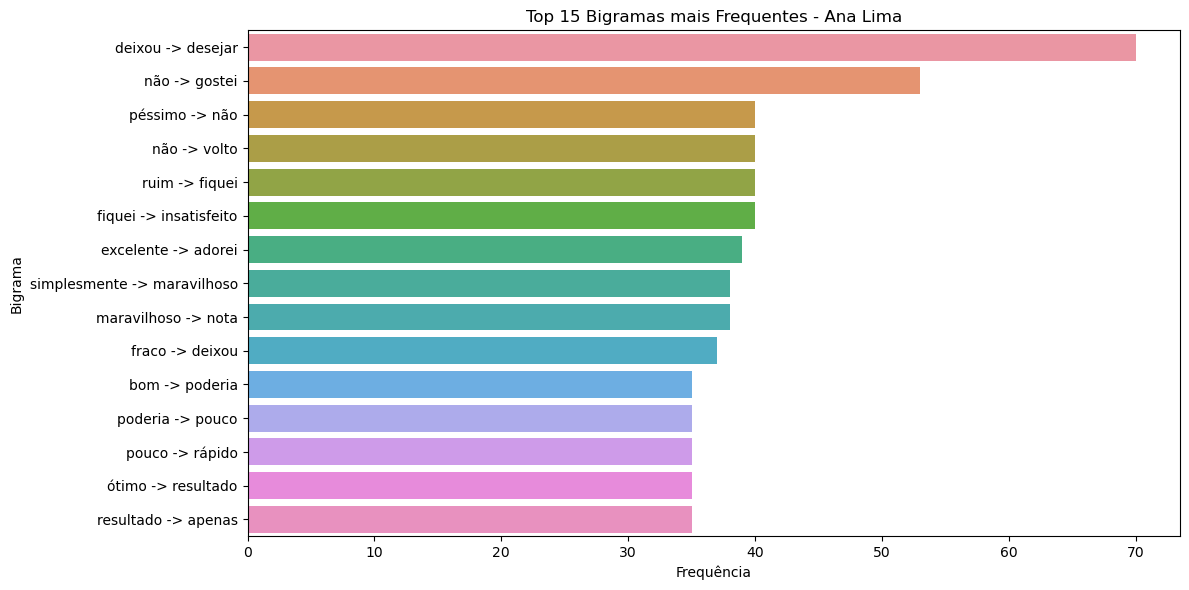

In [22]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Flatten a lista de bigramas
all_bigrams = [bigram for sublist in n_grams for bigram in sublist]

# Contar frequência
bigram_freq = Counter(all_bigrams)

# Pegar os N bigramas mais frequentes (exemplo com top 15)
n_top = 15
most_common = bigram_freq.most_common(n_top)

# Preparar dados para plotagem
bigrams_text = [' -> '.join(bg[0]) for bg in most_common]
frequencies = [bg[1] for bg in most_common]

# Criar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=frequencies, y=bigrams_text)
plt.title('Top 15 Bigramas mais Frequentes - Ana Lima')
plt.xlabel('Frequência')
plt.ylabel('Bigrama')
plt.tight_layout()
plt.show()